<a href="https://colab.research.google.com/github/NikhilTailor9733/Projects/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('stock.csv')
dataset.head(5)


,Date,Open,High,Low,Close,Volume,Name
0,01/03/2006,39.69,41.22,38.79,40.91,24232729.0,ToffeeNut
1,01/04/2006,41.22,41.90,40.77,40.97,20553479.0,ToffeeNut
2,01/05/2006,40.93,41.73,40.85,41.53,12829610.0,ToffeeNut
3,01/06/2006,42.88,43.57,42.80,43.21,29422828.0,ToffeeNut
4,01/09/2006,43.10,43.66,42.82,43.42,16268338.0,ToffeeNut


In [3]:
dataset.describe()

,Open,High,Low,Close,Volume
count,4002.000000,4011.000000,4011.000000,4008.000000,4.012000e+03
mean,27.171607,27.540140,26.826644,27.156791,2.289509e+07
std,12.189774,12.305673,12.134896,12.190433,2.049024e+07
min,9.100000,9.480000,8.940000,8.950000,1.939061e+06
25%,16.170000,16.380000,15.950000,16.120000,1.327610e+07
50%,26.680000,27.070000,26.270000,26.690000,1.843718e+07
75%,33.270000,33.840000,32.900000,33.252500,2.644447e+07
max,73.020000,73.250000,72.460000,72.930000,4.382317e+08


In [4]:
dataset.shape

(4018, 7)

In [5]:
dataset.isnull().sum()

,0
Date,0
Open,16
High,7
Low,7
Close,10
Volume,6
Name,0


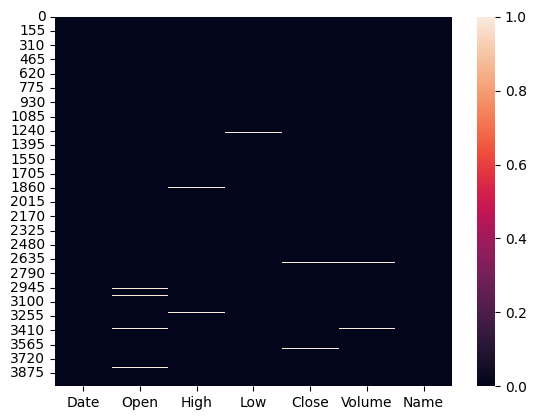

In [6]:
sns.heatmap(dataset.isnull())
plt.show()

In [7]:
dataset.ffill(inplace=True)

In [8]:
dataset.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [9]:
dataset.head(5)

,Date,Open,High,Low,Close,Volume,Name
0,01/03/2006,39.69,41.22,38.79,40.91,24232729.0,ToffeeNut
1,01/04/2006,41.22,41.90,40.77,40.97,20553479.0,ToffeeNut
2,01/05/2006,40.93,41.73,40.85,41.53,12829610.0,ToffeeNut
3,01/06/2006,42.88,43.57,42.80,43.21,29422828.0,ToffeeNut
4,01/09/2006,43.10,43.66,42.82,43.42,16268338.0,ToffeeNut


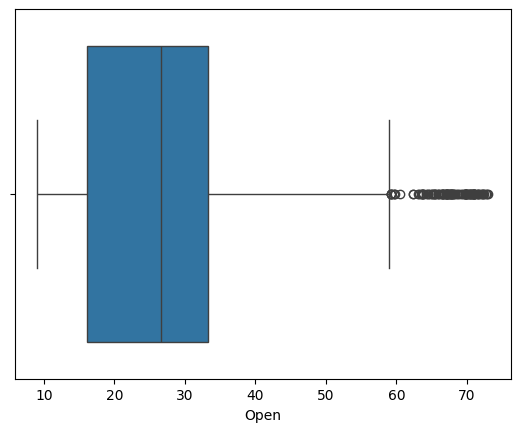

In [10]:
sns.boxplot(x = dataset['Open'])
plt.show()

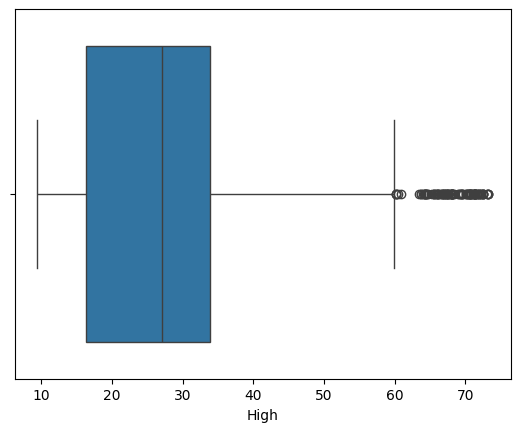

In [11]:
sns.boxplot(x = dataset['High'])
plt.show()

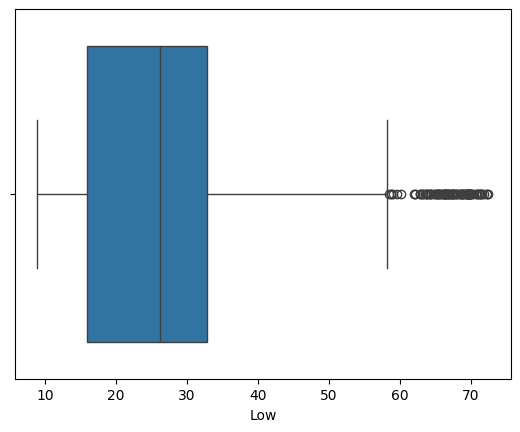

In [12]:
sns.boxplot(x = dataset['Low'])
plt.show()

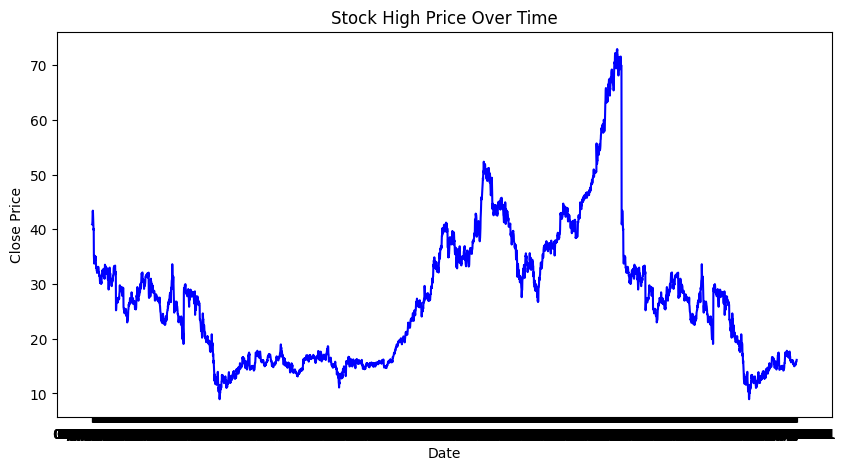

In [13]:
plt.figure(figsize=(10,5))
plt.plot(dataset['Date'], dataset['Close'], color='blue')
plt.title('Stock High Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

x = dataset[['Open', 'Low', 'Volume', 'High']]
y = dataset['Close']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


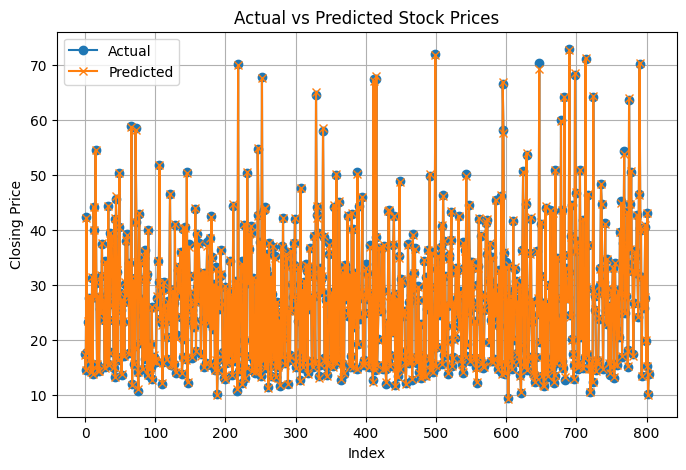

In [16]:
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R² Score:", r2)

Mean Absolute Error: 0.1540589684645532
Mean Squared Error: 0.042568343654953426
Root Mean Squared Error: 0.2063209724069597
R² Score: 0.9996944596040053
